In [49]:
import pandas as pd
import jieba,csv,re
from weibo_preprocess_toolkit import WeiboPreprocess

preprocess = WeiboPreprocess()

df = pd.read_csv('人民日报_new.csv', encoding='utf-8')
df.head()

,微博id,weibo,原始图片url,发布位置,发布时间,发布工具,点赞数,转发数,评论数,label,labelnum
0,Iuw1wpJWh,【#方舱医院唱起我和我的祖国#】16日晚，在武昌方舱医院，一名患者唱起《青藏高原》，迎来满堂...,无,无,2020/2/16 22:59,微博视频,2842,151,455,7_期盼战胜疫情,7
1,IuvJTmldU,【武汉#方舱医院未来3天开放13001张床位#】16日，据武汉市新冠肺炎疫情防控指挥部，武汉...,http://wx4.sinaimg.cn/large/a716fd45gy1gbylqc1...,无,2020/2/16 22:16,微博 weibo.com,3545,222,537,3_支援建设,3
2,IuvDB4WEg,【#疫情面前还好有你在#】疫情期的每一天，他们都和你擦肩而过。为一方平安、万家心安，外卖小哥...,http://ww4.sinaimg.cn/large/a716fd45gy1gbyl7od...,无,2020/2/16 22:02,微博 weibo.com,3825,846,526,9_致敬一线,9
3,IuvxcvB5i,【新冠肺炎最新数据：12连降，湖北新增确诊持续下降，但有些信息仍要重视！】①#湖北以外新增病...,http://ww2.sinaimg.cn/large/a716fd45gy1gbyktl1...,无,2020/2/16 21:46,微博 weibo.com,3053,468,634,2_患病治愈,2
4,Iuvtj3WYM,【#新冠病毒高清彩照#曝光】#新冠病毒究竟长什么样#？美国国家过敏和传染病研究所落基山实验室...,http://ww2.sinaimg.cn/large/a716fd45gy1gbykina...,无,2020/2/16 21:36,微博 weibo.com,6003,744,988,10_病毒研究,10


In [50]:
reader = csv.reader(open("人民日报_new.csv", "r", encoding='utf-8'))
stopwords = {}.fromkeys([line.rstrip() for line in open('Stopword.txt', encoding='utf-8')])
fo = open("weibo_jieba.csv", "a+", encoding='utf-8')
fo.write('content,label')
fo.write('\n')
for item in reader:  # 读取每一行
    if item[0] == '微博id':  # 判断头行
        continue
        
    text = item[1]  # 选择评论数据
    text = re.sub(r'[a-zA-Z0-9]', "", text)
    text = re.sub(r'组图', "", text)
    text = re.sub(r'原图', "", text)
    text = re.sub(r',', "，", text)
    text = re.sub(r'①||②||③||④||⑤||⑥||⑦||⑧||⑨||⑩', "", text)
#     text = re.sub(r'\s.*$', "", text)
#     text = re.sub(r'.%', "", text)
    text = preprocess.preprocess(text)
    fo = open("weibo_jieba.csv", "a+", encoding='utf-8')
    fo.write(text)
    fo.write(',')
    fo.write(item[9])
    
#     seg = jieba.cut(text)

#     result = []
#     for i in seg:  # 去停用词
#         if i not in stopwords:
#             result.append(i)
#     fo = open("weibo_jieba.csv", "a+", encoding='utf-8')
#     for j in result:
#         fo.write(j)
#         fo.write(' ')

    fo.write('\n')
    fo.close()


In [51]:
df2 = pd.read_csv('weibo_jieba.csv',encoding='utf-8')
df2.head()

,content,label
0,方舱 医院 唱起 我 和 我 的 祖国 日晚 在 武昌 方舱 医院 一名 患者 唱起 青藏高...,7_期盼战胜疫情
1,武汉 方舱 医院 未来 天 开放 张 床位 日 据 武汉市 新冠 肺炎 疫情 防控 指挥部 ...,3_支援建设
2,疫情 面前 还好 有 你 在 疫情 期 的 每 一天 他们 都 和 你 擦肩而过 为 一方平...,9_致敬一线
3,新冠 肺炎 最新 数据 连降 湖北 新增 确诊 持续 下降 但 有些 信息 仍 要 重视 湖...,2_患病治愈
4,新冠 病毒 高清 彩照 曝光 新冠 病毒 究竟 长 什么样 美国 国家 过敏 和 传染病 研...,10_病毒研究


In [52]:
df['weibo_content'] = df2['content']
df = df[pd.notnull(df['weibo_content'])]
df.head()

,微博id,weibo,原始图片url,发布位置,发布时间,发布工具,点赞数,转发数,评论数,label,labelnum,weibo_content
0,Iuw1wpJWh,【#方舱医院唱起我和我的祖国#】16日晚，在武昌方舱医院，一名患者唱起《青藏高原》，迎来满堂...,无,无,2020/2/16 22:59,微博视频,2842,151,455,7_期盼战胜疫情,7,方舱 医院 唱起 我 和 我 的 祖国 日晚 在 武昌 方舱 医院 一名 患者 唱起 青藏高...
1,IuvJTmldU,【武汉#方舱医院未来3天开放13001张床位#】16日，据武汉市新冠肺炎疫情防控指挥部，武汉...,http://wx4.sinaimg.cn/large/a716fd45gy1gbylqc1...,无,2020/2/16 22:16,微博 weibo.com,3545,222,537,3_支援建设,3,武汉 方舱 医院 未来 天 开放 张 床位 日 据 武汉市 新冠 肺炎 疫情 防控 指挥部 ...
2,IuvDB4WEg,【#疫情面前还好有你在#】疫情期的每一天，他们都和你擦肩而过。为一方平安、万家心安，外卖小哥...,http://ww4.sinaimg.cn/large/a716fd45gy1gbyl7od...,无,2020/2/16 22:02,微博 weibo.com,3825,846,526,9_致敬一线,9,疫情 面前 还好 有 你 在 疫情 期 的 每 一天 他们 都 和 你 擦肩而过 为 一方平...
3,IuvxcvB5i,【新冠肺炎最新数据：12连降，湖北新增确诊持续下降，但有些信息仍要重视！】①#湖北以外新增病...,http://ww2.sinaimg.cn/large/a716fd45gy1gbyktl1...,无,2020/2/16 21:46,微博 weibo.com,3053,468,634,2_患病治愈,2,新冠 肺炎 最新 数据 连降 湖北 新增 确诊 持续 下降 但 有些 信息 仍 要 重视 湖...
4,Iuvtj3WYM,【#新冠病毒高清彩照#曝光】#新冠病毒究竟长什么样#？美国国家过敏和传染病研究所落基山实验室...,http://ww2.sinaimg.cn/large/a716fd45gy1gbykina...,无,2020/2/16 21:36,微博 weibo.com,6003,744,988,10_病毒研究,10,新冠 病毒 高清 彩照 曝光 新冠 病毒 究竟 长 什么样 美国 国家 过敏 和 传染病 研...


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1203 entries, 0 to 1202
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   微博id           1203 non-null   object
 1   weibo          1203 non-null   object
 2   原始图片url        1168 non-null   object
 3   发布位置           1203 non-null   object
 4   发布时间           1203 non-null   object
 5   发布工具           1203 non-null   object
 6   点赞数            1203 non-null   int64 
 7   转发数            1203 non-null   int64 
 8   评论数            1203 non-null   int64 
 9   label          1203 non-null   object
 10  labelnum       1203 non-null   int64 
 11  weibo_content  1203 non-null   object
dtypes: int64(4), object(8)
memory usage: 122.2+ KB


In [54]:
col = ['label', 'weibo_content']
df = df[col]

In [55]:
df.columns

Index(['label', 'weibo_content'], dtype='object')

In [56]:
df.columns = ['label', 'weibo_content']

In [57]:
df['category_id'] = df['label'].factorize()[0]
from io import StringIO
category_id_df = df[['label', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'label']].values)

In [58]:
df.head()

,label,weibo_content,category_id
0,7_期盼战胜疫情,方舱 医院 唱起 我 和 我 的 祖国 日晚 在 武昌 方舱 医院 一名 患者 唱起 青藏高...,0
1,3_支援建设,武汉 方舱 医院 未来 天 开放 张 床位 日 据 武汉市 新冠 肺炎 疫情 防控 指挥部 ...,1
2,9_致敬一线,疫情 面前 还好 有 你 在 疫情 期 的 每 一天 他们 都 和 你 擦肩而过 为 一方平...,2
3,2_患病治愈,新冠 肺炎 最新 数据 连降 湖北 新增 确诊 持续 下降 但 有些 信息 仍 要 重视 湖...,3
4,10_病毒研究,新冠 病毒 高清 彩照 曝光 新冠 病毒 究竟 长 什么样 美国 国家 过敏 和 传染病 研...,4


c:\users\a5011\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24037 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\a5011\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\a5011\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\a5011\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\a5011\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30149 missing from current font.
  font.set_text(s

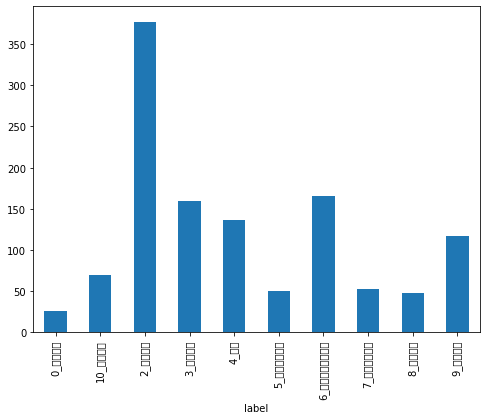

In [59]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('label').weibo_content.count().plot.bar(ylim=0)
plt.show()

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.weibo_content).toarray()
labels = df.category_id
features.shape

(1203, 2922)

In [61]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for label, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(label))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# '0_工作失职':
  . Most correlated unigrams:
       . 处分
       . 纪委
  . Most correlated bigrams:
       . 失职 失责
       . 纪委 监委
# '10_病毒研究':
  . Most correlated unigrams:
       . 疫苗
       . 药物
  . Most correlated bigrams:
       . 新冠 病毒
       . 中国工程院 院士
# '2_患病治愈':
  . Most correlated unigrams:
       . 新增
       . 病例
  . Most correlated bigrams:
       . 新增 确诊
       . 确诊 病例
# '3_支援建设':
  . Most correlated unigrams:
       . 医疗队
       . 支援
  . Most correlated bigrams:
       . 支援 湖北
       . 神山 医院
# '4_防护':
  . Most correlated unigrams:
       . 消毒
       . 转存
  . Most correlated bigrams:
       . 扩散 周知
       . 防疫 指南
# '5_造谣售假隐瞒':
  . Most correlated unigrams:
       . 警方
       . 隐瞒
  . Most correlated bigrams:
       . 故意 隐瞒
       . 犯罪 嫌疑人
# '6_国家政府采取措施':
  . Most correlated unigrams:
       . 启动
       . 退票
  . Most correlated bigrams:
       . 公共卫生 事件
       . 一级 响应
# '7_期盼战胜疫情':
  . Most correlated unigrams:
       . 春暖花开
       . 加油
  . Most correlated bigrams:
       . 中国 加油

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['weibo_content'], df['label'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [63]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['2_患病治愈']


In [64]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['2_患病治愈']


In [65]:
df[df['weibo_content'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

,label,weibo_content,category_id


In [66]:
df[df['weibo_content'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]

,label,weibo_content,category_id


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(penalty='l2',loss='squared_hinge',multi_class='ovr'),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

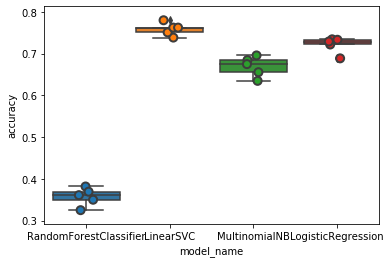

In [68]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [69]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.758942
LogisticRegression        0.721546
MultinomialNB             0.669187
RandomForestClassifier    0.357407
Name: accuracy, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\users\a5011\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\a5011\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30460 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\a5011\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\a5011\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32988 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\a5011\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30123 missing from current font.
  font.set_text(s

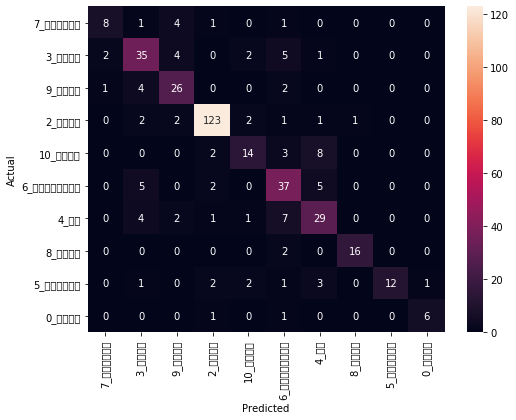

In [71]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.label.values, yticklabels=category_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [72]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['label', 'weibo_content']])
      print('')

'4_防护' predicted as '6_国家政府采取措施' : 7 examples.


,label,weibo_content
622,4_防护,国家 卫健委 发布 新冠 肺炎 防治 营养 膳食 指导 中国 营养 学会 联合 中国 医师 ...
723,4_防护,武汉 全民 体温 监测 上门 排查 与 自查 自 报 相结合 武汉市 即日起 将 开展 全民...
533,4_防护,全国 口罩 企业 复工 复产率 国务院 联防 联控 机制 发布会 国家 发展 改革 委 经贸...
856,4_防护,杭州 所有 村庄 小区 单位 封闭式 管理 月 日 杭州市 人民政府 发布 关于 实施 防控...
610,4_防护,口罩 及其 它 防疫 物资 生产商 加油 生产 吧 别有 后顾之忧 疫情 当前 为了 加大 ...
452,4_防护,北京 发布 条 社区 防控 举措 北京 即将 迎来 返京 人员 流动 高峰 近日 发布 通告...
660,4_防护,国家 市场监管 总局 口罩 制假 售假 顶格 处罚 哄抬物价 从重 处罚 国家 市场监管 总...



'10_病毒研究' predicted as '4_防护' : 8 examples.


,label,weibo_content
1175,10_病毒研究,钟南山 解读 新型 冠状病毒 肺炎 疫情 疫情 进展 情况 如何 是否 会 重复 疫情 钟南...
1136,10_病毒研究,重点 关注 新型 冠状病毒 怕 酒精 不耐高温 武汉 同济 医院 感染 科主任 宁琴 解读 ...
408,10_病毒研究,钟南山 等 专家 连线 武汉 团队 今天 日 下午 钟南山 院士 及 广州 医科大学 附属 ...
717,10_病毒研究,转扩 关于 新冠 肺炎 的 个 真相 什么 是 新型 冠状病毒 什么 人会 传染 它 具体 ...
1177,10_病毒研究,钟南山 等 权威专家 解读 新型 冠状病毒 防控 新型 冠状病毒 如何 防控 是否 会 重复...
65,10_病毒研究,九图 了解 血浆 治疗 什么样 的 新冠 肺炎 患者 适合 血浆 治疗 血浆 治疗 临床 效...
667,10_病毒研究,钟南山 建议 医护人员 轮休 钟南山 提醒 医护人员 规范 防护 日 下午 钟南山 院士 在...
1176,10_病毒研究,钟南山 肯定 新型 冠状病毒 肺炎 存在 人 传人 钟南山 根据 目前 的 资料 新型 冠状...


In [73]:
model.fit(features, labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [74]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# '0_工作失职':
  . Top unigrams:
       . 征用
       . 大理
  . Top bigrams:
       . 纪委 监委
       . 失职 失责
# '10_病毒研究':
  . Top unigrams:
       . 研究
       . 药物
  . Top bigrams:
       . 核酸 检测
       . 中国工程院 院士
# '2_患病治愈':
  . Top unigrams:
       . 病例
       . 出院
  . Top bigrams:
       . 聚集 疫情
       . 确诊 病例
# '3_支援建设':
  . Top unigrams:
       . 建设
       . 床位
  . Top bigrams:
       . 支援 湖北
       . 驰援 湖北
# '4_防护':
  . Top unigrams:
       . 消毒
       . 防护
  . Top bigrams:
       . 所有 小区
       . 病例 北京
# '5_造谣售假隐瞒':
  . Top unigrams:
       . 辟谣
       . 隐瞒
  . Top bigrams:
       . 犯罪 嫌疑人
       . 危害 公共安全
# '6_国家政府采取措施':
  . Top unigrams:
       . 免费
       . 恢复
  . Top bigrams:
       . 疫情 防控
       . 疫情 期间
# '7_期盼战胜疫情':
  . Top unigrams:
       . 加油
       . 今天
  . Top bigrams:
       . 医院 医生
       . 加油 人民日报
# '8_开学考试':
  . Top unigrams:
       . 教育部
       . 学生
  . Top bigrams:
       . 培训 机构
       . 发布 通知
# '9_致敬一线':
  . Top unigrams:
       . 致敬
       . 医生
  . Top bigrams:
    

In [100]:
df3 = pd.read_csv('新京报.csv',encoding='utf-8')
df3.head()

,微博id,微博正文,原始图片url,发布位置,发布时间,发布工具,点赞数,转发数,评论数
0,IuwdlgZ5q,【#专家呼吁别再过度消杀# 无人机消毒屋马路喷洒都不靠谱】2月13日，深圳市疾控中心发表了一...,无,无,2020/2/16 23:29,微博 weibo.com,459,106,121
1,Iuw1aeqtG,【#Tony老师组团给警察免费理发# 组织者：“生意”火爆行程已排到10天后】2月14日，江...,无,无,2020/2/16 23:00,微博 weibo.com,1003,69,108
2,IuvYG094y,【#湖北孝感升级管控措施#：所有城镇居民严禁外出】据@孝感发布 16日，孝感市#新型冠状病毒...,http://ww2.sinaimg.cn/large/61ff32dely1gbymopb...,无,2020/2/16 22:53,无,2283,73,451
3,IuvKWoKAC,【#日本多名患者感染路径不明# 新冠疫情已进入新阶段】据NHK报道，日本厚生劳动省16日上午...,无,无,2020/2/16 22:20,微博 weibo.com,1106,77,210
4,IuvuH49lW,#追殡葬车女孩与父亲居家观察中#【“追殡葬车哭喊妈妈”女孩去世？知情人：女孩与其父居家观察中...,无,无,2020/2/16 21:40,微博 weibo.com,3258,419,398


In [101]:
reader = csv.reader(open("新京报.csv", "r", encoding='utf-8'))

texts = []
wiids = []
fo = open("新京报_predict.csv", "a+", encoding='utf-8')
fo.write('label,weibo_content')
fo.write('\n')
for item in reader:  # 读取每一行
    if item[0] == '微博id':  # 判断头行
        continue
        
    text = item[1]  # 选择评论数据
#     text = re.sub(r'[a-zA-Z0-9]', "", text)
#     text = re.sub(r'组图', "", text)
#     text = re.sub(r'原图', "", text)
#     text = re.sub(r'①||②||③||④||⑤||⑥||⑦||⑧||⑨||⑩', "", text)
#     text = re.sub(r'\s.*$', "", text)
#     text = re.sub(r'.%', "", text)
    wiids.append(item[0])
    text = preprocess.preprocess(text)
    texts.append(text)
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted,wiid in zip(texts, predictions,wiids):
    fo = open("新京报_predict.csv", "a+", encoding='utf-8')
    fo.write(wiid)
    fo.write(',')
    fo.write(id_to_category[predicted])
    fo.write(',')
    fo.write(text)
    fo.write('\n')
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(id_to_category[predicted]))
    print("")
    fo.close()

"微博 正文"
  - Predicted as: '3_支援建设'

"专家 呼吁 别 再 过度 消杀 无人机 消毒 屋 马路 喷洒 都 不靠 谱 深圳市 疾控中心 发表 了 一篇 反对 过度 消杀 的 文章 深圳市 疾控中心 专家 在 接受 采访 时 表示 从 消毒 专业 的 角度 来说 所有 的 化学 消毒剂 都 是 要 避人 的 消毒 小屋 对人 消毒 不尽合理 而 在 露天 的 场所 中 如果 没有 明显的 污染物 对 空气 路面 绿化带 消毒 也 都 是 没有 必要 的"
  - Predicted as: '4_防护'

"tony 老师 组团 给 警察 免费 理发 组织者 生意 火爆 行程 已排 到 天后 江苏 常州 天宁 交警大队 外 交警 间隔 半米 到 一米 排成 长队 等候 理发 警队 大厅 里 几名 理发师 正在 忙碌 他们 是 自发 前来 给 民警 免费 剪发 的 有 民警 感激 称 这是 雪中送炭 新型 冠状病毒"
  - Predicted as: '6_国家政府采取措施'

"湖北 孝感 升级 管控 措施 所有 城镇居民 严禁 外出 据 孝感市 新型 冠状病毒 肺炎 防控 指挥部 发布 第 号令 以下 为 全文 湖北 孝感 升级 管控 措施 所有 城镇居民 严禁 外出   组图 共 张   原图"
  - Predicted as: '4_防护'

"日本 多名 患者 感染 路径 不明 新冠 疫情 已 进入 新 阶段 据 nhk 报道 日本 厚生 劳动 省 上午 确认 钻石 公主 号 邮轮 上 新增 名 新型 冠状病毒 感染 病例 累计 确诊 病例 达 例 停靠在 横滨 的 这 艘 邮轮 让 日本 成为 除 中国 外 确诊 病例 最多 的 国家 日本 新增 了 例 确诊 病例 涉及 个 地区 值得 关注 的 是 其中 多名 患者 的 感染 路径 不明 新型 冠状病毒 日本 多名 患者 感染 路径 不明 新冠 疫情 已 进入 新 阶段"
  - Predicted as: '2_患病治愈'

"追 殡葬 车 女孩 与 父亲 居家 观察 中 追 殡葬 车 哭喊 妈妈 女孩 去世 知情人 女孩 与 其父 居家 观察 中 网友 发布 追 殡葬 车 哭喊 妈妈 女孩 去世 消息 引发 关注 知情人 告诉 与 女孩 联络 过 其 状态 尚可 与

"大衣 哥 菜园 开 演唱会 为 中国 加油 此前 已 捐 万 抗疫 山东 单县 的 大衣 哥 朱之文 近日 在 一个 菜园 里 开 了 一场 一个 人 的 演唱会 借此 宣传 疫情 防控 为 中国 加油 为 武汉 加油 此前 朱之文 骑 着 三轮车 到 镇政府 给 武汉 和 家乡 各捐 了 万元 的 现金 用于 抗击 疫情"
  - Predicted as: '7_期盼战胜疫情'

"北京朝阳医院 副 院长 童 朝晖 新冠 肺炎 患者 与 sars 相比 病情 进展 更 快 新型 冠状病毒 北京朝阳医院 副 院长 童 朝晖 表示 新冠 肺炎 患者 出现 的 是 严重的 呼吸衰竭 与 的 sars 相比 病情 进展 得 更 快 缺氧 发展 得 很 明显 此外 这次 患者 心脏 受到 的 攻击 非常 厉害 救治 起来 的 难度 比 以前 要 大 因此 我们 提出 要密"
  - Predicted as: '4_防护'

"金银 潭 医院院长 患者 康复 后 体内 含 抗体 恳请 捐赠 血浆 张定宇 恳请 治愈 患者 捐献 血浆 据 消息 武汉市 金银 潭 医院院长 张定宇 表示 患者 康复 后 体内 含有 大量 综合 抗体 能够 对 抗病毒 也 恳请 康复 后 的 患者 积极 来到 金银 潭 医院 伸出 你 的 胳膊 捐献 你 宝贵的 血浆 共同 救治 还 在 与 病魔 作 斗争 的 病人 新型 冠状病毒 金银 潭 医院院长 患者 康复 后 体内 含 抗体 恳请 捐赠 血浆     原图"
  - Predicted as: '10_病毒研究'

"继 十堰 张湾后 湖北 大悟县 实施 战时 管制 继 湖北省 十堰市 张湾区 发布 全国 首个 战时 管制 令后 湖北 又 一 区县 跟进 今日 下午 大悟县 政府 官网 显示 大悟县 新型 冠状病毒 感染 肺炎 疫情 防控 指挥部 发布 紧急 通告 称 全县 城区 镇区 所有 楼栋 实施 战时 封闭 管理 紧急 通告 称 全县 城区 镇   原图"
  - Predicted as: '6_国家政府采取措施'

"阿里 云单 季度 营收破 百亿 暴增 倍 就 在 刚刚 阿里巴巴 发布 了 本年度 q 的 财报 云 业务 的 强劲 增长 引发 多方 关注 其中 阿里 云 的 季度 营收 表现 颇为 亮眼 达到 了 亿 

"国家 卫健委 将 认真 研究 李文亮 发病 诊疗 过程 国务院 联防 联控 机制 新闻 发布会 下午 召开 针对 武汉 中心医院 医生 李文亮 的 发病 和 诊疗 过程 国家 卫生 健康 委 新闻 发言人 宣传司 司长 宋 树立 表示 后续 将 认真 研究 李文亮 病例 国家 卫健委 将 研究 李文亮 发病 诊疗 过程 新型 冠状病毒 国家 卫健委 将 认真 研究 李文亮 的 发病 和 诊疗 过程   原图"
  - Predicted as: '10_病毒研究'

"致敬 李文亮 在 平凡 中 通往 不凡 新 京报 评论 这 大概 就是 平凡人 的 不平凡 之 处 困难 面前 总有 于无声处 听 惊雷 有人 不怕 不畏惧 不逃避 李文亮 之 死 因为 生前 的 事功 在 舆论 场中 被 赋予 了 某种 超越 的 价值 这种 超越 的 价值 是 什么 呢 是 一个 社会 对 真话 的 渴求 对 真相 的 尊重 而 人们 深知 我们 的 所有 尊严 就 来自 于 真相 与 真话 以及 勇于 直面 现实 李文亮 与 这些 医务人员 的 可贵 之处 就 在于 尽管 他们 很 平凡 但 他们 始终 抱 有 对 高贵 价值 的 信念 感 以 充沛 的 道德感 与 责任心 投入 抗疫 事业 中 他们 以 一颗 赤子之心 与 脚踏实地 的 行动 力 做出 了 不凡的 事 这 正是 平凡人 不平凡 的 意涵 所在 平凡 与 不凡 互通 不凡 并非 遥不可及 而 从 平凡 到 不凡的 源头活水 就 在于 全 社会 尊重 每 一种 微末 的 平凡 赋予 每 一种 平凡 以 尊严 新型 冠状病毒 致敬 李文亮 在 平凡 中 通往 不凡 新 京报 评论"
  - Predicted as: '9_致敬一线'

"国务院 联防 联控 机制 发布会 时 国务院 联防 联控 机制 召开 新闻 发布会 介绍 进一步 做好 重点 地区 疫情 防控 工作 提高 收治 率 治愈率 和 降低 感染率 病死率 等 相关 情况 新 京报 现场直播 敬请 观看 新 京报 的 微博 直播"
  - Predicted as: '6_国家政府采取措施'

"广东 现 首例 死亡 病例 肇庆 一 患者 隐瞒 接触 史 确诊 当天 抢救无效 死亡 下午 广东 肇庆 封开县 一名 新冠 肺炎 确诊 患者 确诊 时 已 

"野狼 disco 伴奏 版权 方 律师 发声 美元 买 的 版本 不能 用作 商演 野狼 disco 侵权 引热议 网传 文章 称 作者 将 伴奏 在 中国 地区 综合性 版权 独家 卖 给 玛西玛 国际 称 自己 付费 美元 购买 了 无 限制 的 版权 可 用于 商演 玛西玛 国际 律师 赵智功 律师 称 是否 侵权 应 提供 合同 证据 而 非 网页 截图"
  - Predicted as: '6_国家政府采取措施'

"隔离区 穿 纸尿裤 的 后 医生 年轻 力量 该站 出来 了 北京 医疗队 飞往 武汉 援助 队员 们 年龄 差 显着 既有 在 sars h n 等 疫情 中 身经百战 的 老兵 还有 从未 穿过 隔离 服 的 年轻人 据统计 医疗队 人中 有 名 后 王皓 出生 是 其中 最小 的 一个 王皓 说 不能 光让 年长者 顶 在 风口 年"
  - Predicted as: '3_支援建设'

"快讯 澳门 特首 贺一诚 澳门 赌场 将 停业 半月 据 香港 无线 新闻 刚刚 消息 澳门特区 行政长官 贺一诚 表示 为 防止 疫情 扩散 澳门 决定 暂停 博彩业 及 相关 娱乐 行业 半个 月 环球网   原图"
  - Predicted as: '6_国家政府采取措施'

"北京 定点 医务人员 可以 免费打 滴滴 这些 司机 冲 在 抗疫 最 前线 滴滴 成立 北京 首支 医护 保障 车队 为 北京 救治 定点医院 医务 工作者 提供 免费 接送 服务 疫情 发生 后 滴滴 出行 在 武汉 组建 社区 保障 车队 医护 保障 车队 成为 首家 组建 保障 车队 的 网约车 企业 并 在 上海 北京 等 地 成立 医护 保障 免费 车队"
  - Predicted as: '6_国家政府采取措施'

"一线 医声 援鄂 日记 一 剪子 剪 了 长发 切断 传播 途径 更 重要 早上 刚刚 点 就 睡不着 了 想起 昨天 郑康 老师 说长 头发 工作 不方便 也 可 造成 感染 没时间 犹豫 舍不得 了 一 剪子 剪 了 养 了 的 长发 丑 是 丑 了 点 但 切断 传播 途径 更 重要 王军 红 是 北京大学第三医院 援鄂 医疗队 队员 之一 擅长 急危重症 患者 的 诊治 整理 了 王军 红 从 武汉 发来 的 援 鄂 日志 

"关注 北京 冬奥会 北京 冬奥会 首场 测试 赛 取消 举行 国际 雪联 高山 滑雪 世界杯 延庆 站 组委会 发布 信息 北京 冬奥会 首场 测试 赛 国际 雪联 高山 滑雪 世界杯 延庆 站 比赛 取消 举行 北京 冬奥会 首场 测试 赛 取消 举行   原图"
  - Predicted as: '6_国家政府采取措施'

"铁路部门 延长 退票 时限 转发 周知 时前 购买 的 乘车 日期 在 时至 时 的 车票 可 延期 至 时前 办理 退票   原图"
  - Predicted as: '6_国家政府采取措施'

"北京 累计 报告 肺炎 病例 例 其中 出院 例 死亡 例 截至 时 北京市 累计 报告 新型 冠状病毒 感染 的 肺炎 病例 例 其中 出院 例 死亡 例 在 治 例 确诊 病例 均 在 市级 定点医院 进行 隔离 治疗 病情 平稳 例 重症 例 危重症 例 确诊 病例 分布 东城区 例 西城区 例 朝阳区 例 海淀区 例 丰台区 例 石景山区 例 门头沟区 例 通州区 例 顺义区 例 大兴区 例 昌平区 例 房山区 平谷区 怀柔区 密云 区 延庆 区 尚未 发现 确诊 病例 外地 来京 人员 例 央视 北京 通报 截至 时 累计 报告 新型 冠状病毒 感染 的 肺炎 病例 例 出院 病例 例     原图"
  - Predicted as: '2_患病治愈'

"北京 新冠 肺炎 疫情 防控 发布会 下午 北京市人民政府 新闻 办公室 举行 北京市 新型 冠状病毒 感染 的 肺炎 疫情 防控 工作 新闻 发布会 介绍 新型 冠状病毒 感染 的 肺炎 疫情 防控 工作 有关 情况 正在 直播 敬请 关注 新型 冠状病毒 新 京报 直播 新 京报 的 微博 直播"
  - Predicted as: '6_国家政府采取措施'

"北京 疫情 有 转入 扩散 期 迹象 疫情 高发区 来京 人员 将 需 报告 全市 确诊 病例 逐步 攀升 疫情 出现 由 输入 期 转入 扩散 期 的 迹象 春节 后 返京 大 人流 即将 到来 防疫 工作 到 了 紧要关头 北京市委 办 市政府办 今天 联合 发文 提出 疫情 出现 由 输入 期 转入 扩散 期 的 迹象 要求 对 疫情 高发区 来京 人员 加强 筛查 建立 报告 制度 新型 冠状病毒 北京

"预约 量 超 日常 数倍 上海 取消 办理 结婚登记 上海市 民政局 提醒 请 新 人们 不要 在 近期 尤其 是 等 日子 扎堆 进行 结婚登记 上海市 民政局 官方 微信 今天 发布公告 取消 全市 个市 区 两级 婚姻登记 机构 原定 于 今年 周日 为 新人 加班 办理 结婚登记 预约 量 超 日常 数倍 上海 取消 结婚登记 办理   原图"
  - Predicted as: '6_国家政府采取措施'

"放弃 串门 这波 网络 拜年 猝不及防 却 又 顺理成章 沸腾 大年初一 熬夜 守岁 之后 醒来 本该 是 走亲访友 串门 拜年 的 时候 但 今年春节 会 和 往年 大不一样 今年 就算 在 偏远 小城 甚至 乡村 想必 登门 拜年 的 人 也 会 大幅 减少 受 新型 肺炎 疫情 影响 在家 过年 减少 聚会 就是 给 抗击 疫情 做 贡献 已成 共识"
  - Predicted as: '8_开学考试'

"武汉 岁 女童 确诊 新冠 肺炎 广西 河池市 新增 例新冠 病毒 肺炎 确诊 病例 最小 的 为 岁 女童 凌晨 时 广西壮族自治区 卫生 健康 委 发布 通报 河池市 新增 例 新型 冠状病毒 感染 的 肺炎 确诊 病例 患者 邹某 女 岁 金城江区 人 发病 前 在 武汉 居住 从 武汉 乘坐 火车 返回 金城 江 出现 轻微 咳嗽 患者 出现 咳嗽 咳痰 咽痛 肌肉 酸痛 胸闷 于 下午 时许 到 河池市 人民 医院 就诊 予以 住院 隔离 治疗 目前 病情 稳定 患者 钟某 女 岁 武汉市 人 常住 武汉 从 武汉 飞往 南宁 后 乘坐 汽车 到 金城 江 下午 时 出现 发热 打喷嚏 于 凌晨 时到 河池市 人民 医院 就诊 予以 住院 隔离 治疗 目前 病情 稳定 目前 河池市 累计 报告 新型 冠状病毒 感染 的 肺炎 确诊 病例 例 澎湃 新闻     原图"
  - Predicted as: '2_患病治愈'

"四川 新增 例新冠 肺炎 确诊 病例 按照 新型 冠状病毒 感染 的 肺炎 诊疗 方案 规定 根据 病例 临床表现 结合 流行病学 史 和 实验室 检测 结果 四川省 新型 冠状病毒 感染 的 肺炎 病例 确认 专家组 确认 我省 新增 新型 冠状病毒 感染 的 肺炎 病例 例 截至 时 我省 累计 报告 

  - Predicted as: '10_病毒研究'

"全球 变暖 到底 会 带来 什么 马住 纪录片 南极洲 末日 的 地球 你 知道 海平面 微弱的 上升 对 人类 宜居 环境 的 巨大 影响 吗 你 知道 气温 升高 造成 南极 冰川 融化 如何 影响 到 全球 的 雨雪 吗 你 知道 海洋 温度 上升 度 对 海洋生物 的 毁灭性 打击 有 多 大 吗 环球 纪录 频道 的 微博 视频 环球 纪录 频道"
  - Predicted as: '6_国家政府采取措施'

"你 痛恨 的 不是 特权 是 自己 没特权 庸俗化 了 舆论监督 新 京报 评论 你 痛恨 的 不是 特权 而是 自己 没有特权 这 两天 某起 你 懂 的 事件 引爆 舆论 后 有人 又 抛出 了 这番 论调 在 网上 激起 不小 的 讨论 相对 于 由 嫉妒 引发 的 痛恨 那种 对 由于 规则 被 破坏 而 带来 的 不安全感 才 是 人们 发声 批评 的 关键 说到底 将 舆论监督 说成 是 对 自己 没有 享受 特权 的 不忿 是 将 严肃 话题 庸俗化 解读 它会 模糊 舆论监督 的 焦点 甚至 将 舆论监督 陷入 一种 不可知论 的 境地 如果 认为 每个 人 批评 特权 的 动机 都 是 恶意的 舆论监督 的 正当性 到底 在 哪里 舆论 批评 特权 享受 者 是因为 特权 破坏 了 规则 是因为 特权 让 公共利益 受损 这 不一定 要配 上 什么 特别的 赞许 但 也 绝不 是 一句 你 痛恨 的 不是 特权 而是 自己 没有特权 所 能 贬抑 对 特权 的 敏感 也 是 社会 进步的 动力 拿 你 痛恨 的 不是 特权 是 自己 没特权 对 其 诛心 还 做 高人状 没有 太 大 意义 你 痛恨 的 不是 特权 是 自己 没特权 庸俗化 了 舆论监督"
  - Predicted as: '9_致敬一线'

"上海 卫健委 上海 未 发现 新型 冠状病毒 肺炎 网上 消息 不一定 属实 一则 深圳 和 上海 出现 武汉 肺炎 疑似病例 的 消息 在 网上 流传 经济 观察 网 拨打 上海市 卫健委 官方 卫生 热线电话 求证 接线 工作人员 表示 目前为止 上海 没有 发现 新型 冠状病毒 病例 网上 的 不一定 是 真实的 上海 没有 发现 新型 冠状病毒 肺炎 


"中 美 第一阶段 经贸 协议 全文 发布 据 财政部 网站 消息 财政部 发布 中 美 第一阶段 经贸 协议 公告 全文如下 关于 发布 中 美 第一阶段 经贸 协议 的 公告 美 东 时间 中 美 双方 在 美国 华盛顿 签署 中华人民共和国政府 和 美利坚合众国政府 经济 贸易 协议 以下 简称 协议 现 发布 协议 中英文 签字 文本 财政部 发展 改革 委 农业 农村部 商务部 人民银行 附件 中华人民共和国政府 和 美利坚合众国政府 经济 贸易 协议 中文 英文 详见 财政部 网站   组图 共 张     原图"
  - Predicted as: '6_国家政府采取措施'

"赵忠祥 遗体 告别仪式 在 八宝山 举行 著名 主持人 赵忠祥 去世 新 京报 记者 从 赵忠祥 经纪人 处 获悉 将 于 上午 十点 在 八宝 山东 礼堂 举行 遗体 告别仪式 赵忠祥 去世 赵忠祥 遗体 告别仪式 将 于 在 八宝山 举行   组图 共 张   原图"
  - Predicted as: '5_造谣售假隐瞒'

"名 中国 男子 柬埔寨 绑架 虐待 女同胞 被捕 暴力 索要 赎金 画面 曝光 柬埔寨 西港 名 中国 男子 因 绑架勒索 殴打 名 女同胞 而 被 逮捕 警方 表示 他们 为 惯犯 曾 与 受害人 为 朋友 但 之后 闹翻 歹徒 约 受害人 吃饭 随后 将 她 绑架 歹徒 拍 下 女子 被打 视频 发给 女子 母亲 索要 万元 赎金 其母 交 了 部分 赎金 后 女子 男友 带 着 视频 到 警局 报案 警方 将 受害人 救出 并 将 名 嫌犯 逮捕 抓捕 过程 中 警方 曾 开枪 示警 受害人 目前 已 无 大碍 案件 仍 在 调查 中"
  - Predicted as: '5_造谣售假隐瞒'

"直击 北京 两会 城市 治理 要 不断 提高 精治共治 法治 水平 下午 市政协 十三届 三次 会议 召开 构建 超大 城市 治理 体系 建设 国际 一流 和谐 宜居 之 都 专题 座谈会 市委 副 书记 市长 陈吉宁 表示 超大 城市 治理 是 一项 系统工程 要 做 长期 不断 地 研究 和 探索 北京 的 超大 城市 治理 核心 是 要 处理 好 都 与 城 的 关系 要 努力 把 北京 的 首都 优势 制度 优势 文化 优势 等 转化 为

In [86]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['label'].unique()))

              precision    recall  f1-score   support

    7_期盼战胜疫情       0.73      0.53      0.62        15
      3_支援建设       0.67      0.71      0.69        49
      9_致敬一线       0.68      0.79      0.73        33
      2_患病治愈       0.93      0.93      0.93       132
     10_病毒研究       0.67      0.52      0.58        27
  6_国家政府采取措施       0.62      0.76      0.68        49
        4_防护       0.62      0.66      0.64        44
      8_开学考试       0.94      0.89      0.91        18
    5_造谣售假隐瞒       1.00      0.55      0.71        22
      0_工作失职       0.86      0.75      0.80         8

    accuracy                           0.77       397
   macro avg       0.77      0.71      0.73       397
weighted avg       0.78      0.77      0.77       397

